In [80]:
pairs = ((2, 5), (4, 2), (9, 8), (12, 10))
#count the number of pairs (a, b) such that both a and b are even.

xlist=[]
ylist=[]

for i in range(len(pairs)):
    x, y = pairs[i]
    xlist.append(x)
    ylist.append(y)

z=sum(c%2 for c in [x+y for x,y in zip(xlist,ylist)])
print(z)
#oder

t=sum([y%2==0 and x%2==0 for x,y in pairs])
print(t)

    
    

2
2


In [64]:
sum(x%2 for x in range(100))

50

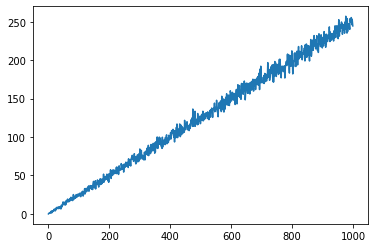

In [35]:
'''Generates a plot of inner products calculated for 2 vectors generated in 1 to k dimensional spaces'''
import numpy as np
import matplotlib.pyplot as plt

k=0
kmax=1000

innerlist=[]

while k!=kmax: #loop kmax times
    vlist=[] 
    wlist=[]
    
    for i in range(k): #Generate lists with increasing length representing vectors in k dimensions
        vlist.append(np.random.uniform(0,1)) #vector 1
        wlist.append(np.random.uniform(0,1)) #vector 2
    
    inner=sum([vdimensions*wdimensions for vdimensions, wdimensions in zip(vlist, wlist)])

    innerlist.append(inner) #add inner product for respective k to final list

    k+=1 #increment k towards kmax
    
plt.plot(innerlist)
plt.show()

In [1]:
def vector_gene_simple(k):
    '''Generate 2 vectors in a k-dimensional euclidian space
    using array creation with np.random.random'''
    
    import numpy as np
    vectors=2*np.random.random((2,k))-1
    
    return(vectors)

def vector_gene_complicated(k):
    '''Generate 2 vectors in a k-dimensional euclidian space
    using an array created with np.empty and np.random.random'''
    
    import numpy as np
    vectors=np.empty((2,k))
    
    for i in range(2):
        
        for j in range(k):
            vectors[i, j] = 2*np.random.uniform()-1 
            
    return(vectors)

def vector_gene_complicated_normal(k):
    '''Generate 2 vectors in a k-dimensional euclidian space
    using an array created with np.empty and np.random.random'''
    
    import numpy as np
    vectors=np.empty((2,k))
    
    for i in range(2):
        
        for j in range(k):
            vectors[i, j] = np.random.normal(loc=0.0, scale=0.75) 
            
    return(vectors)  

In [2]:
def vector_gene(U):
    '''This is a switch which upon the nature of U 
    switches between the existing three generators.'''
    
    if U=='simple':
        data=vector_gene_simple(k)
    elif U=='complicated':
        data=vector_gene_complicated(k)
    elif U=='normal':
        data=vector_gene_complicated_normal(k)
    
    return(data)

In [3]:
def innerproduct_gene(k,generator_type):
    '''Depending upon the generator_type requested, an array will be generated and fed into this subscript.
    Here the inner product can be calculated and is returned.'''
        
    vector_array=vector_gene(generator_type)
    
    x=vector_array.transpose()
    #Arrange your array in such a way,
    #that values are grouped according to the dimensions
    
    innerproduct=0

    for i in range(k):
   
        directionalvalues=x[i] #slice out all directional values for one dimension
        y=1
        
        for j in range(2):
            y=y*directionalvalues[j] #multiplicate all directional values
        
        innerproduct=innerproduct+y
    
    return(innerproduct)

In [4]:
def vector_gene_simple_angles():
    '''If vectors are defined by the angle between them, 
    generate 2 vectors in polar coordinates with equal length
    in 2 dimensions,using np.random.random.
    Length of vectors is 1, why cos(angle) equals the inner product.'''
    
    import numpy as np
    angles=2*np.pi*np.random.random() #generate a random number between 0 to 2pi
    product=angles 
    
    for i in range(2):
        product=np.cos(angles)   
    
    return(product)

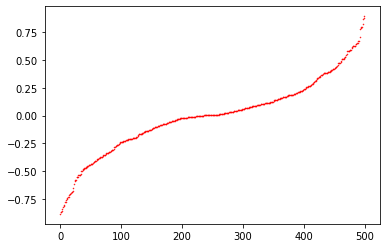

In [50]:
'''Set number of dimensions(k) and generator script (U = simple V complicated V normal) for cartesian.
If you want same length of vectors use polar coordinates in 2 dim. (k=2): Use generator_type='polar'.
Set n according to the number of scalar products you need.'''

import numpy as np
import matplotlib.pyplot as plt

k=10
n=500
generator_type='simple'

innerproducts=[]

for i in range(n):
    
    if generator_type=='polar':
        
        product=vector_gene_simple_angles()
    
    else:  
    
        product=innerproduct_gene(k,generator_type)
       
    innerproducts.append(product)


innerproducts.sort()
#plt.hist(innerproducts)
plt.plot(innerproducts, marker='o', color='r', linestyle='None', markersize=0.5)
plt.show()


In [105]:
#x, y=zip(vector_array.transpose())

#fig = plt.figure(figsize=(10,7))
#plt.axes().set_aspect('equal')
#plt.scatter(x,y)
#plt.show()

#'''perhaps define coloring better?'''
#fig = plt.figure(figsize=(10,7))
#plt.axes().set_aspect('equal')
#origin=[0],[0]
#plt.quiver(*origin, x, y, color=['r','g','b'], scale=5)
#plt.show()